In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoo_fin import stock_info as y_fin
import json
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

# Charting

In [2]:
def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return [xrange, k*xrange + b]

In [3]:
def PlotTimeSeries(ticker, years_ago=5, months_ago=0):
    #closeHist = pd.DataFrame(FinDB[ticker]['stockHist']['Close']).rename({'Close':'Price'}, axis=1)
    try:
        closeHist = pd.DataFrame(yf.Ticker(ticker).history(period='max')['Close']).rename({'Close':'Price'}, axis=1)
        closeHist.index = closeHist.index.to_pydatetime()
        closeHist.index.name = 'Date'
    except json.JSONDecodeError:
        closeHist = pd.DataFrame(y_fin.get_data(ticker)['close']).rename({'close':'Price'}, axis=1)
        closeHist.index = closeHist.index.to_pydatetime()
        closeHist.index.name = 'Date'
    closeHist = closeHist[closeHist.index > dt.datetime.now() + relativedelta(years=-years_ago)]
    closeHist.reset_index(inplace=True)
    closeHist['Month'] = closeHist.Date.apply(lambda x: dt.date(x.year, x.month, 1))
    closeHist = closeHist.groupby('Month').mean().rename({'Price':'Price(Monthly avg.)'}, axis=1)
    closeHist['x_index'] = pd.Series(range(len(closeHist.index)), closeHist.index)
    MinSeries = closeHist['Price(Monthly avg.)'][(closeHist['Price(Monthly avg.)'].shift(1) > closeHist['Price(Monthly avg.)']) & (closeHist['Price(Monthly avg.)'].shift(-1) > closeHist['Price(Monthly avg.)'])]
    MaxSeries = closeHist['Price(Monthly avg.)'][(closeHist['Price(Monthly avg.)'].shift(1) < closeHist['Price(Monthly avg.)']) & (closeHist['Price(Monthly avg.)'].shift(-1) < closeHist['Price(Monthly avg.)'])]
    BothSeries = pd.concat([MinSeries, MaxSeries]).sort_index()
    MaxMaxSeries = BothSeries[(BothSeries.shift(1) < BothSeries) & (BothSeries.shift(-1) < BothSeries)]
    MinMinSeries = BothSeries[(BothSeries.shift(1) > BothSeries) & (BothSeries.shift(-1) > BothSeries)]
    #3PTL Buy Line
    X = list()
    Y = list()
    x_1_date = MaxSeries.idxmax()
    x_1 = closeHist[closeHist.index==x_1_date].x_index.iloc[0]
    X.append(x_1)
    Y.append(MaxSeries.max())
    try:
        x_2_date = MaxSeries[MaxSeries.index > x_1_date].idxmax()
        x_2 = closeHist[closeHist.index==x_2_date].x_index.iloc[0]
        X.append(x_2)
        Y.append(MaxSeries[MaxSeries.index > x_1_date].max())
    except ValueError:
        pass
    #3PTL Sell Line
    X2 = list()
    Y2 = list()
    x2_1_date = MinSeries.idxmin()
    x2_1 = closeHist[closeHist.index==x2_1_date].x_index.iloc[0]
    X2.append(x2_1)
    Y2.append(MinSeries.min())
    try:
        x2_2_date = MinSeries[MinSeries.index > x2_1_date].idxmin()
        x2_2 = closeHist[closeHist.index==x2_2_date].x_index.iloc[0]
        X2.append(x2_2)
        Y2.append(MinSeries[MinSeries.index > x2_1_date].min())
    except ValueError:
        pass

    plt.figure(figsize=[20,9])
    with plt.style.context('fivethirtyeight'):
        plt.plot(closeHist['Price(Monthly avg.)'], zorder=0)
        if len(X) < 2:
            pass
        else: 
            ThreePtB = drawLine2P(x=X,y=Y,xlims=[closeHist['x_index'].values.min(),
                                      closeHist['x_index'].values.max()+1])
            print('Buy Price for', ticker, 'is', round(ThreePtB[1][-1], 2))
            plt.plot(closeHist.index, ThreePtB[1],
                     c='g', linestyle='dashed')
            
        if len(X2) < 2:
            pass
        else: 
            ThreePtS = drawLine2P(x=X2,y=Y2,xlims=[closeHist['x_index'].values.min(),
                                      closeHist['x_index'].values.max()+1])
            print('Sell Price for', ticker, 'is', round(ThreePtS[1][-1], 2))
            plt.plot(closeHist.index, ThreePtS[1],
                     c='r', linestyle='dashed')
            
        plt.scatter(MinSeries.index, 
                    MinSeries,
                    c='r', s=50, zorder=10)
        plt.scatter(MaxSeries.index, 
                    MaxSeries,
                    c='g', s=50, zorder=10)
        plt.scatter(MaxMaxSeries.index, 
                    MaxMaxSeries,
                    c='y', s=100, zorder=5)
        plt.scatter(MinMinSeries.index, 
                    MinMinSeries,
                    c='y', s=100, zorder=5)
    plt.legend([closeHist.columns[0]])
    plt.autoscale()
    plt.show()

In [4]:
def Chart3PTL(tickerListing, years=5, mos=0):
    List = tickerListing.split()
    for i in List:
        print(i)
        PlotTimeSeries(i, years, mos)

FMG.AX
Sell Price for FMG.AX is 14.76


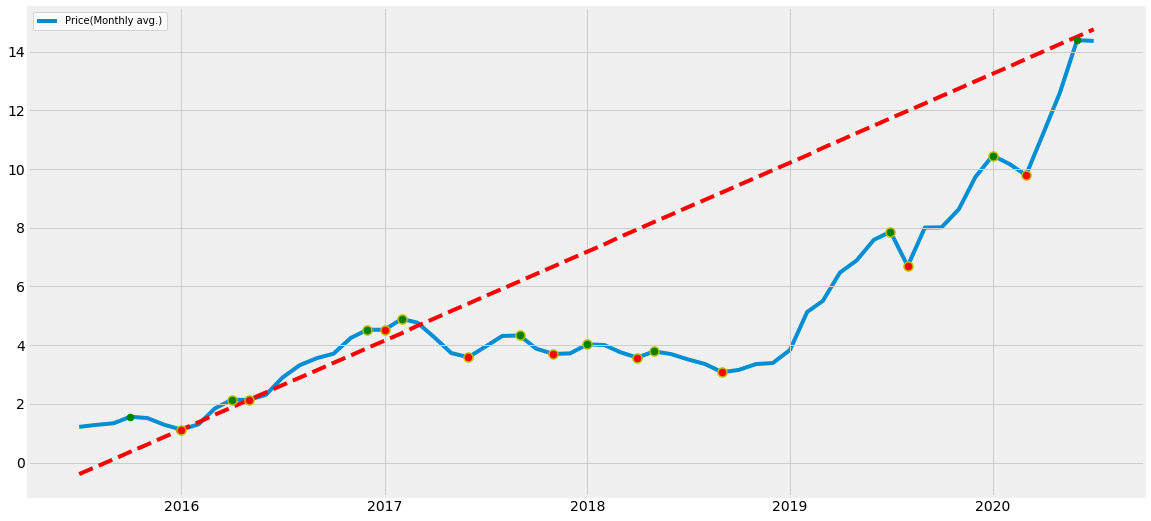

RMS.AX
Sell Price for RMS.AX is 0.58


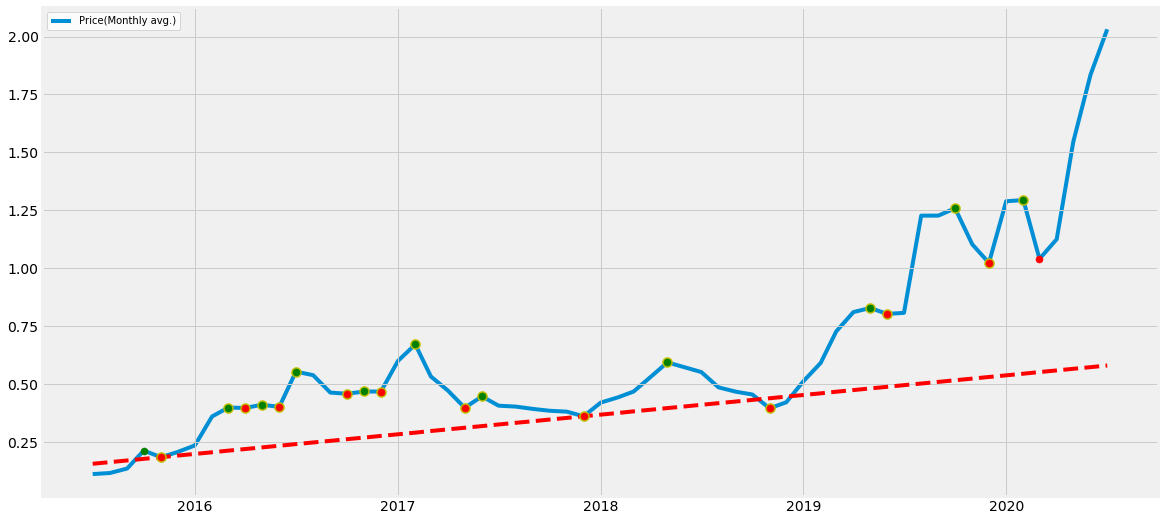

SFC.AX
Sell Price for SFC.AX is 4.55


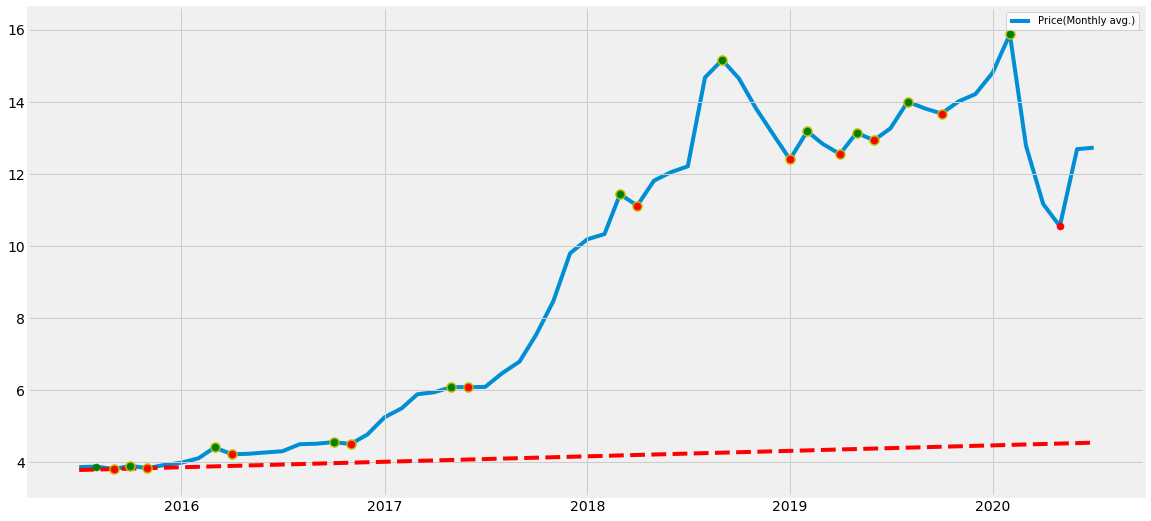

PRU.AX
Sell Price for PRU.AX is 0.56


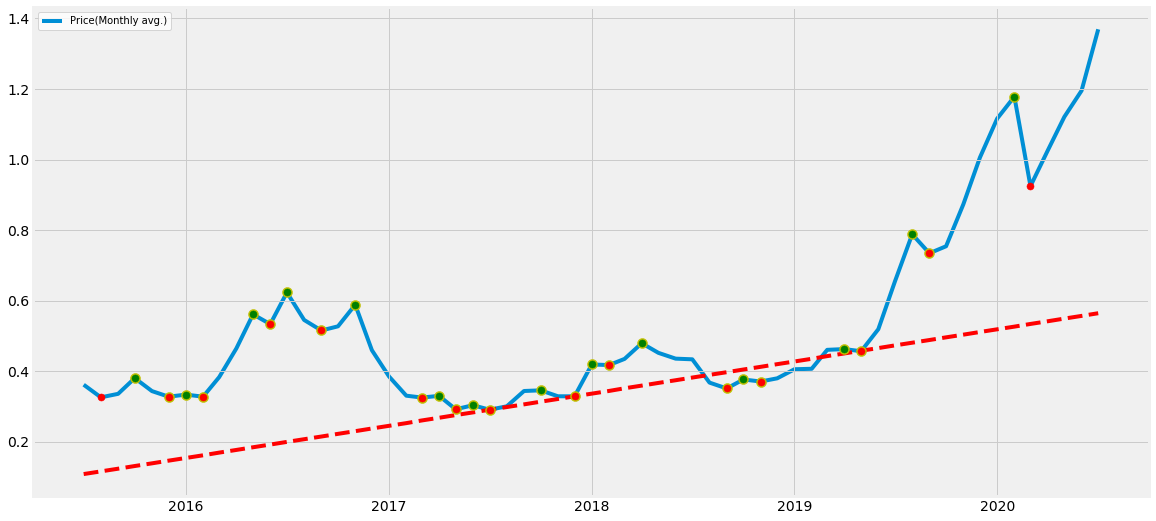

AQG.AX
Sell Price for AQG.AX is 2.21


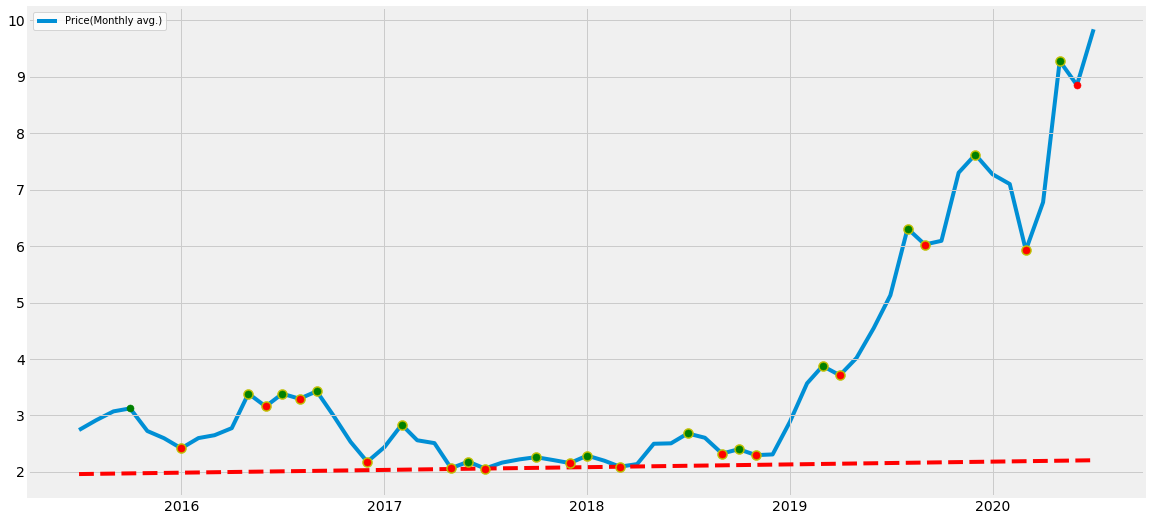

STO.AX
Buy Price for STO.AX is 4.87
Sell Price for STO.AX is 3.16


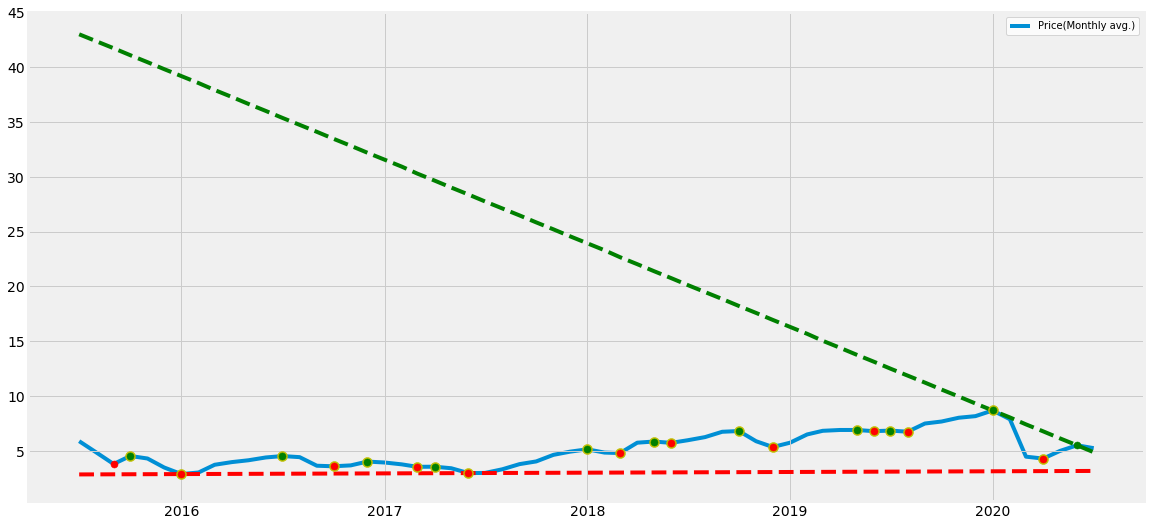

BFG.AX
Sell Price for BFG.AX is 0.91


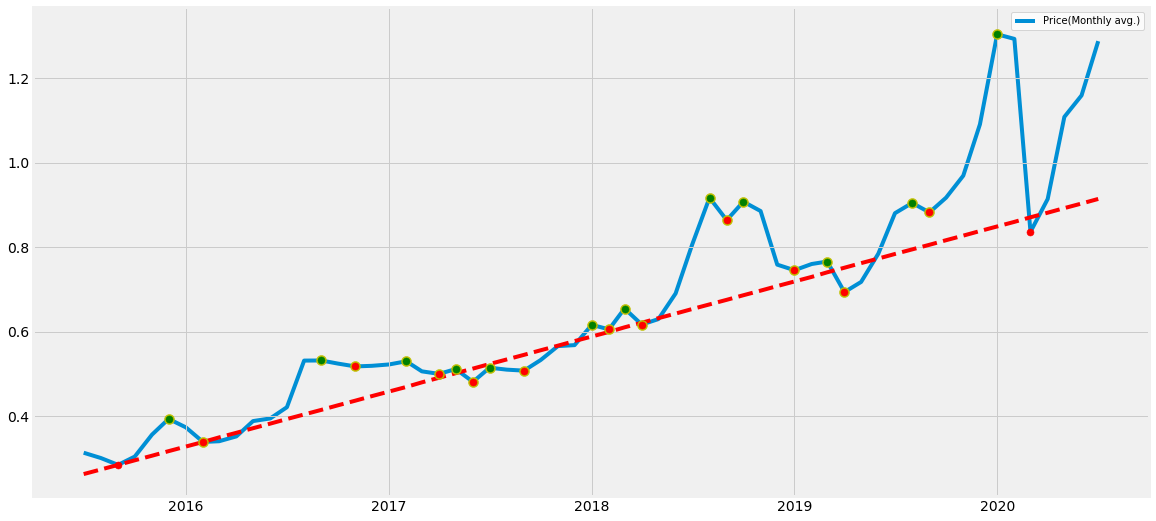

KOV.AX
Sell Price for KOV.AX is 2.07


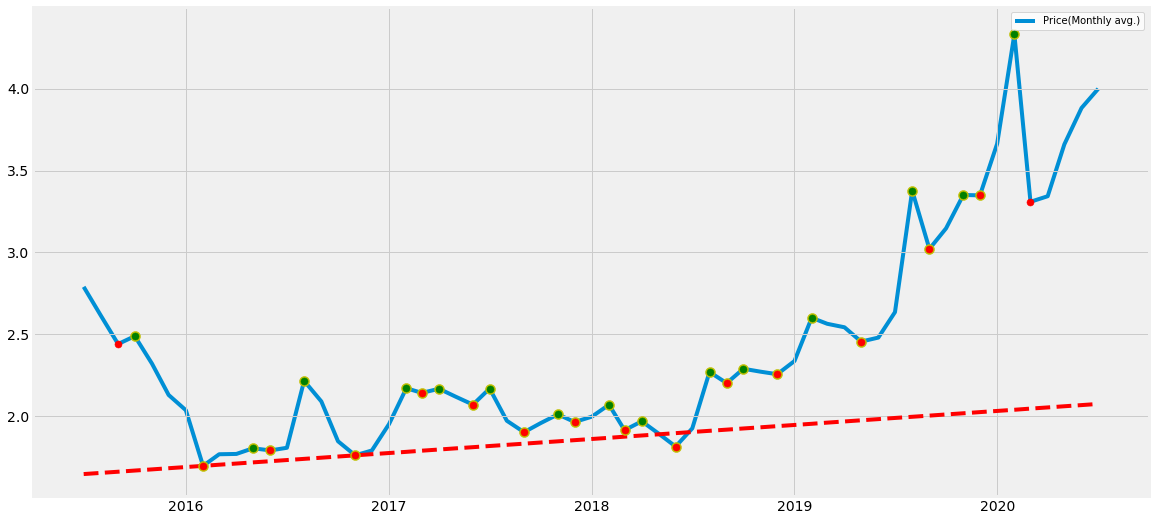

RRL.AX
Buy Price for RRL.AX is 3.18
Sell Price for RRL.AX is 3.59


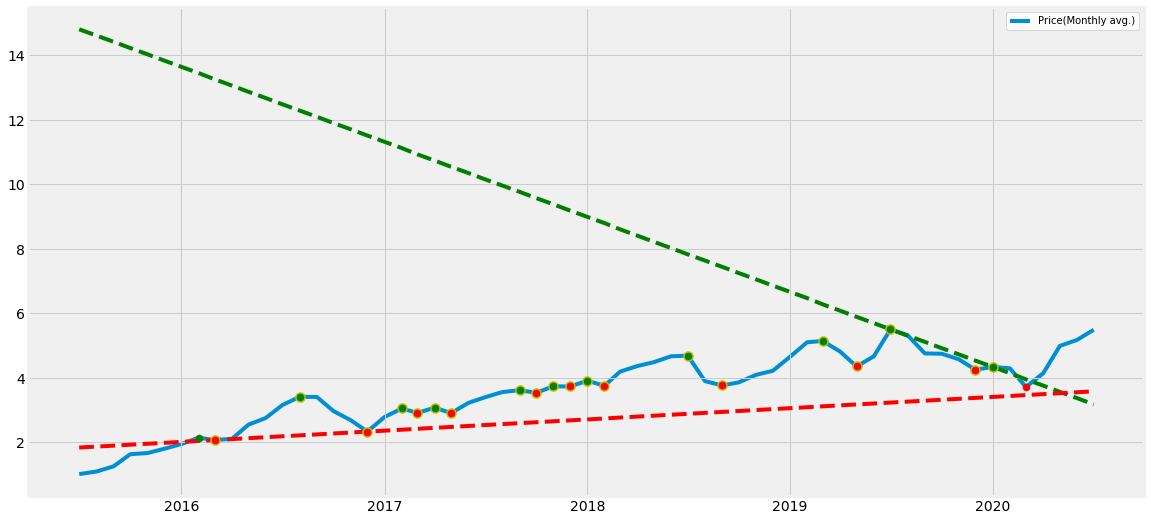

HAW.AX
Sell Price for HAW.AX is 0.04


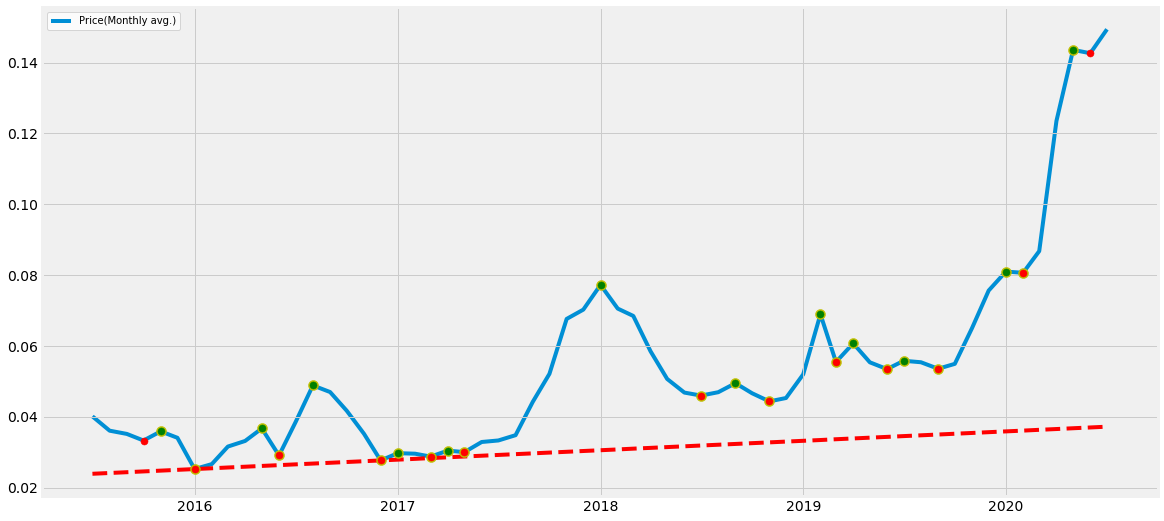

MRC.AX
Sell Price for MRC.AX is 0.15


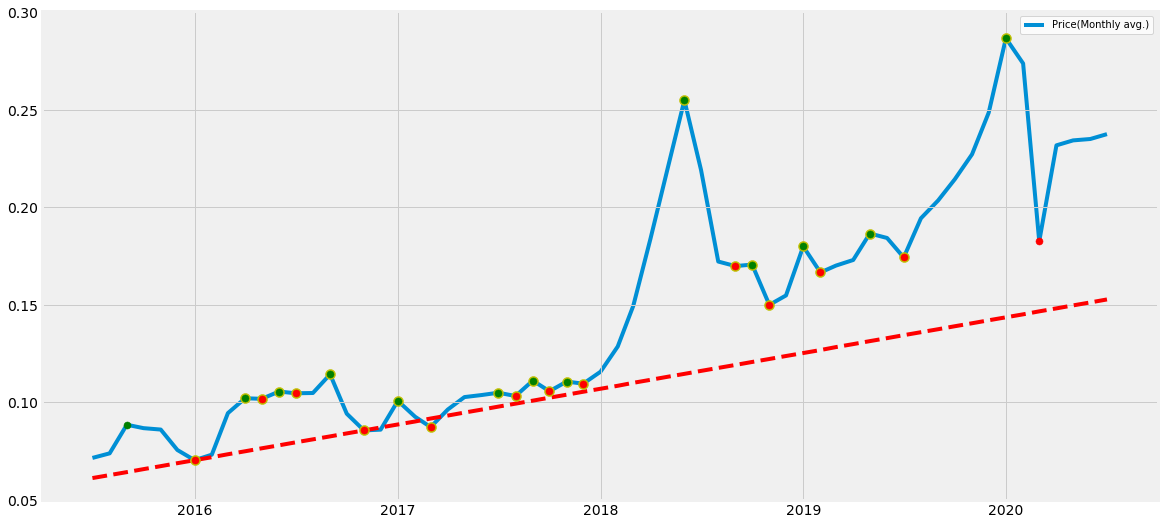

KRM.AX
Buy Price for KRM.AX is 0.2
Sell Price for KRM.AX is 0.03


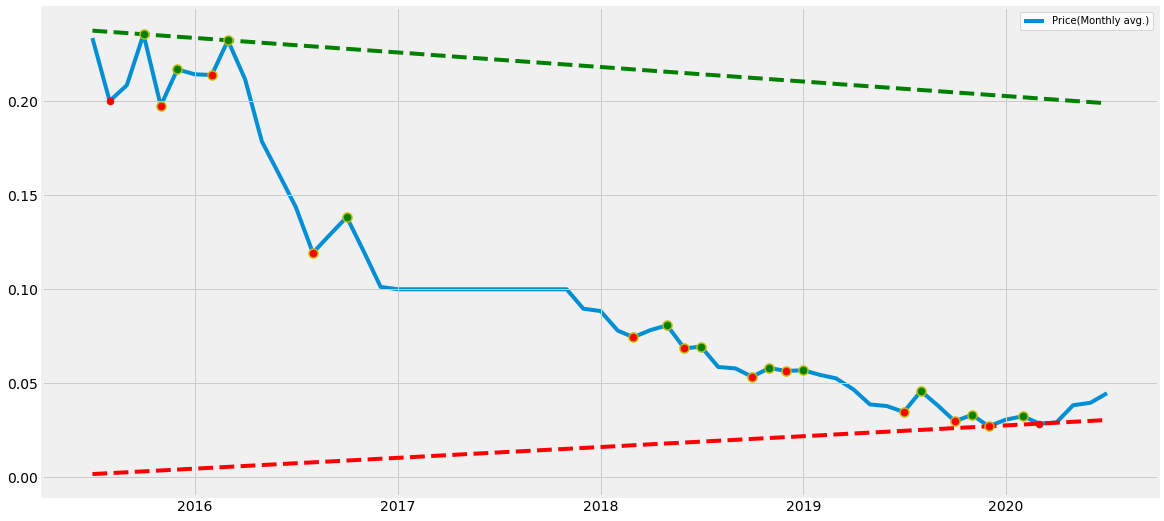

GEAR.AX
Sell Price for GEAR.AX is 43.12


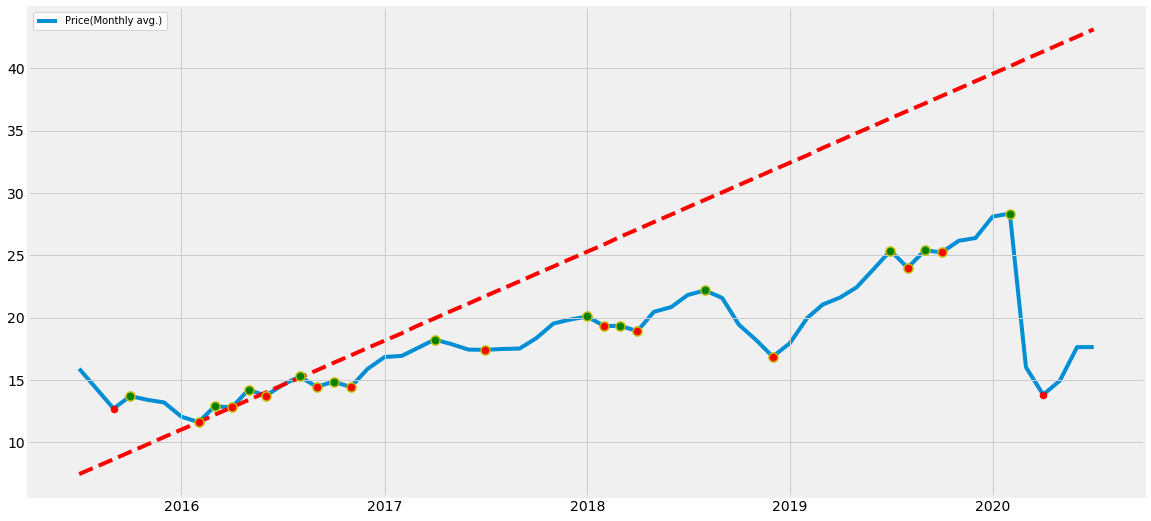

AGD.AX
Buy Price for AGD.AX is 0.11
Sell Price for AGD.AX is 0.07


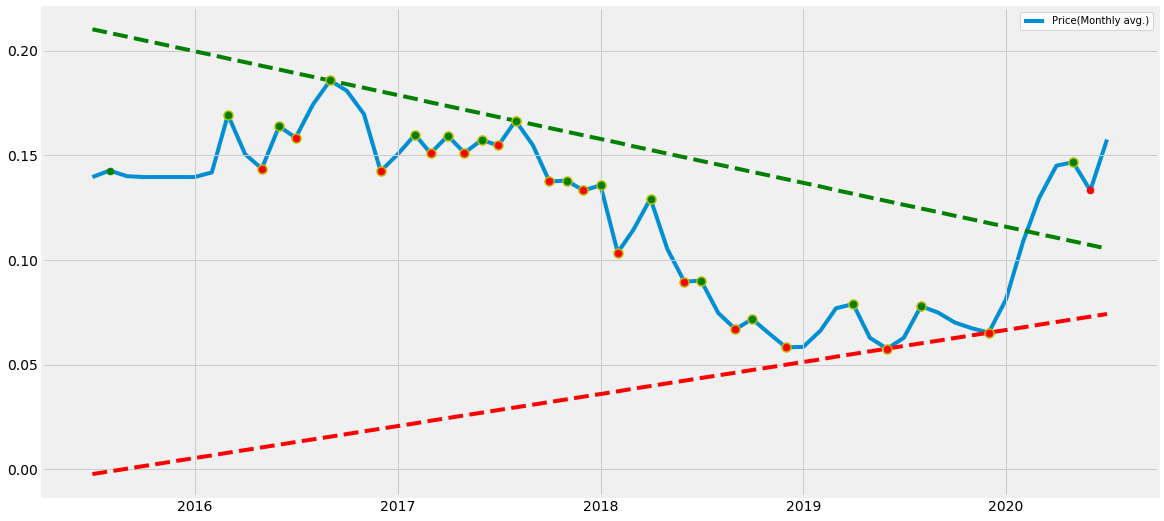

MML.AX
Buy Price for MML.AX is 0.83
Sell Price for MML.AX is 0.3


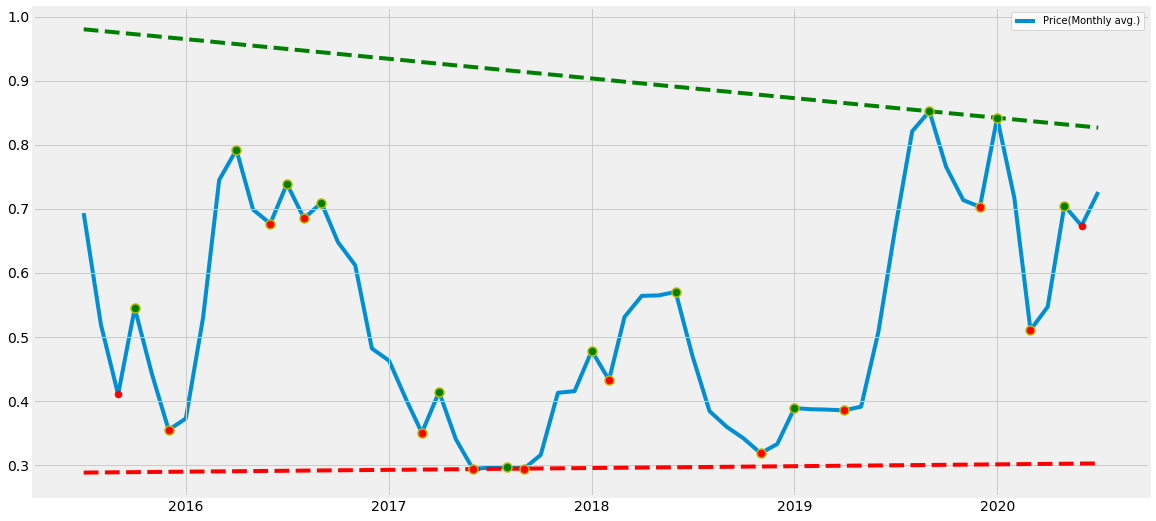

In [6]:
Chart3PTL("""FMG.AX
RMS.AX
SFC.AX
PRU.AX
AQG.AX
STO.AX
BFG.AX
KOV.AX
RRL.AX
HAW.AX
MRC.AX
KRM.AX
GEAR.AX
AGD.AX
MML.AX""")